In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# 加载数据
df = pd.read_csv('data.csv')
df.head(10)

,name,level,area,hot,price,num
0,成都大熊猫繁育研究基地,4A景区,四川·成都·成华区,热度 0.8,55.0,1574
1,青城山,5A景区,四川·成都·都江堰市,热度 0.96,80.0,596
2,成都海昌极地海洋公园,4A景区,四川·成都·双流区,热度 0.0,145.0,642
3,都江堰,5A景区,四川·成都·都江堰市,热度 1.0,80.0,378
4,成都动物园,NaN,四川·成都·成华区,热度 0.7,20.0,1170
5,成都欢乐谷,4A景区,四川·成都·金牛区,热度 0.74,100.0,506
6,成都武侯祠,4A景区,四川·成都·武侯区,热度 0.9,50.0,166
7,成都杜甫草堂博物馆,4A景区,四川·成都·青羊区,热度 0.86,50.0,162
8,花舞人间,4A景区,四川·成都·新津县,热度 0.0,61.4,1224
9,国色天乡·陆地乐园,NaN,四川·成都·国色天乡,热度 0.0,45.0,126


In [26]:
df.describe( )  # 描述性统计

,price,num
count,675.000000,675.000000
mean,143.417956,147.776296
std,652.256150,674.864760
min,0.100000,2.000000
25%,24.950000,22.000000
50%,58.000000,56.000000
75%,128.000000,89.000000
max,14580.000000,14312.000000


In [27]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    675 non-null    object 
 1   level   204 non-null    object 
 2   area    675 non-null    object 
 3   hot     675 non-null    object 
 4   price   675 non-null    float64
 5   num     675 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 31.8+ KB


# 数据预处理

In [28]:
df.head( )

,name,level,area,hot,price,num
0,成都大熊猫繁育研究基地,4A景区,四川·成都·成华区,热度 0.8,55.0,1574
1,青城山,5A景区,四川·成都·都江堰市,热度 0.96,80.0,596
2,成都海昌极地海洋公园,4A景区,四川·成都·双流区,热度 0.0,145.0,642
3,都江堰,5A景区,四川·成都·都江堰市,热度 1.0,80.0,378
4,成都动物园,NaN,四川·成都·成华区,热度 0.7,20.0,1170


In [29]:
# 对空值进行填充
df['level'] = df['level'].fillna(0)  # 用0来填充空值
df.head( )

,name,level,area,hot,price,num
0,成都大熊猫繁育研究基地,4A景区,四川·成都·成华区,热度 0.8,55.0,1574
1,青城山,5A景区,四川·成都·都江堰市,热度 0.96,80.0,596
2,成都海昌极地海洋公园,4A景区,四川·成都·双流区,热度 0.0,145.0,642
3,都江堰,5A景区,四川·成都·都江堰市,热度 1.0,80.0,378
4,成都动物园,0,四川·成都·成华区,热度 0.7,20.0,1170


In [30]:
df['level'] = df['level'].apply(lambda x:0 if x==0 else int(x[0])) # 处理景区等级
df.head()

,name,level,area,hot,price,num
0,成都大熊猫繁育研究基地,4,四川·成都·成华区,热度 0.8,55.0,1574
1,青城山,5,四川·成都·都江堰市,热度 0.96,80.0,596
2,成都海昌极地海洋公园,4,四川·成都·双流区,热度 0.0,145.0,642
3,都江堰,5,四川·成都·都江堰市,热度 1.0,80.0,378
4,成都动物园,0,四川·成都·成华区,热度 0.7,20.0,1170


- 处理热度

In [33]:
# 先将热度数字字符串提取出来，然后转化为浮点型数据，保留两位小数，最后的结果还要转化为浮点型数据
df['hot']=df['hot'].apply(lambda x:float('%.2f'%float(x.split(' ')[-1]))) # "-1"就是取列表里面最后一个元素
df.head()

,name,level,area,hot,price,num
0,成都大熊猫繁育研究基地,4,四川·成都·成华区,0.80,55.0,1574
1,青城山,5,四川·成都·都江堰市,0.96,80.0,596
2,成都海昌极地海洋公园,4,四川·成都·双流区,0.00,145.0,642
3,都江堰,5,四川·成都·都江堰市,1.00,80.0,378
4,成都动物园,0,四川·成都·成华区,0.70,20.0,1170


In [35]:
# 对区域中的省、市、区处理
df['province'] = df['area'].apply(lambda x:x.split('·')[0])
df['city'] = df['area'].apply(lambda x:x.split('·')[1])
df['mini_city'] = df['area'].apply(lambda x:x.split('·')[-1])
df.head( )

,name,level,area,hot,price,num,province,city,mini_city
0,成都大熊猫繁育研究基地,4,四川·成都·成华区,0.80,55.0,1574,四川,成都,成华区
1,青城山,5,四川·成都·都江堰市,0.96,80.0,596,四川,成都,都江堰市
2,成都海昌极地海洋公园,4,四川·成都·双流区,0.00,145.0,642,四川,成都,双流区
3,都江堰,5,四川·成都·都江堰市,1.00,80.0,378,四川,成都,都江堰市
4,成都动物园,0,四川·成都·成华区,0.70,20.0,1170,四川,成都,成华区


In [36]:
# 删除原来的area列
del df['area']
df.head()

,name,level,hot,price,num,province,city,mini_city
0,成都大熊猫繁育研究基地,4,0.80,55.0,1574,四川,成都,成华区
1,青城山,5,0.96,80.0,596,四川,成都,都江堰市
2,成都海昌极地海洋公园,4,0.00,145.0,642,四川,成都,双流区
3,都江堰,5,1.00,80.0,378,四川,成都,都江堰市
4,成都动物园,0,0.70,20.0,1170,四川,成都,成华区


# 数据分析

- 统计销量最多的前10个景点

In [38]:
num_top = df.sort_values(by='num',ascending=False) # "False"降序
num_top

,name,level,hot,price,num,province,city,mini_city
60,上海海昌海洋公园,4,0.00,294.00,14312,上海,上海,浦东新区
61,上海迪士尼乐园,0,0.00,355.00,5550,上海,上海,浦东新区
105,北京环球度假区,0,0.00,485.76,5194,北京,北京,通州区
109,故宫博物院,5,1.00,34.90,4377,北京,北京,东城区
69,南山文化旅游区,5,0.76,122.00,2610,海南,三亚,崖州区
...,...,...,...,...,...,...,...,...
529,千岛湖高空跳伞,0,0.00,2270.00,2,浙江,杭州,建德市
650,纪晓岚故居,0,0.70,9.70,2,北京,北京,西城区
461,上海外滩星空艺术馆,0,0.00,58.00,2,上海,上海,黄浦区
508,孔庙和国子监博物馆,4,0.00,0.70,2,北京,北京,东城区


In [39]:
num_top = num_top.reset_index(drop=True) # 重置
num_top.head()

,name,level,hot,price,num,province,city,mini_city
0,上海海昌海洋公园,4,0.00,294.00,14312,上海,上海,浦东新区
1,上海迪士尼乐园,0,0.00,355.00,5550,上海,上海,浦东新区
2,北京环球度假区,0,0.00,485.76,5194,北京,北京,通州区
3,故宫博物院,5,1.00,34.90,4377,北京,北京,东城区
4,南山文化旅游区,5,0.76,122.00,2610,海南,三亚,崖州区


C:\Users\ZXT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ZXT\AppData\Local\Temp/ipykernel_9048/3826612873.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show( )


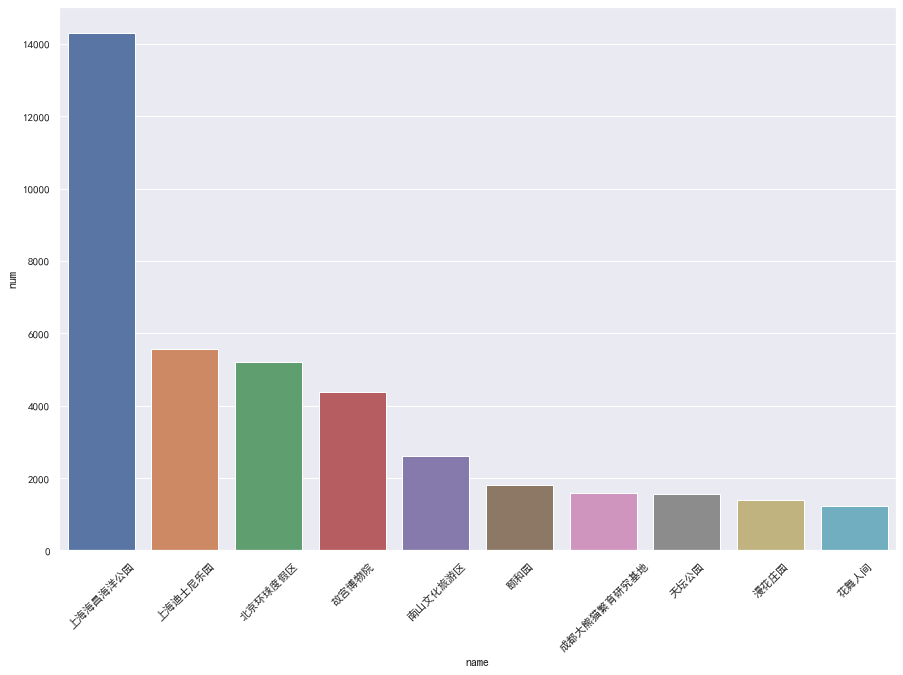

In [40]:
plt.rcParams['font.sans-serif']=['Microsoft YaHei']    # 设置字体：微软雅黑
import seaborn as sns
sns.set(font='SimHei')  # 设置中文编码
fig = plt.figure(figsize=(15,10))   # 设置画布
sns.barplot(num_top['name'][:10],num_top['num'][:10])  # 绘制条形图（x轴、y轴）
plt.xticks(rotation = 45)  # 横坐标字体旋转45度
fig.show( )

- 景区评级和省份的关系

In [41]:
df['level_sum']=1  # 新添加一个level_sum列，设置初始值为1
var = df.groupby(['province','level'])['level_sum'].sum()
var

province  level
上海        0         50
          3          2
          4         18
          5          4
北京        0         40
          4         24
          5         10
四川        0         58
          4         15
          5          2
广东        0        116
          4         29
          5          4
江苏        4          1
浙江        0         55
          3          1
          4         16
          5          4
海南        0         63
          4          6
          5          6
重庆        0         38
          4         28
          5          9
陕西        0         51
          3          1
          4         17
          5          7
Name: level_sum, dtype: int64

In [42]:
var.unstack()  # 将series转换为DataFrane,再重索引分别转换为DataFranne的行和列

level,0,3,4,5
province,,,,
上海,50.0,2.0,18.0,4.0
北京,40.0,NaN,24.0,10.0
四川,58.0,NaN,15.0,2.0
广东,116.0,NaN,29.0,4.0
江苏,NaN,NaN,1.0,NaN
浙江,55.0,1.0,16.0,4.0
海南,63.0,NaN,6.0,6.0
重庆,38.0,NaN,28.0,9.0
陕西,51.0,1.0,17.0,7.0


<AxesSubplot:xlabel='province'>

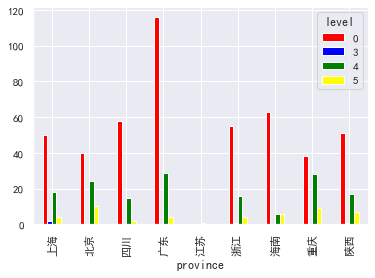

In [47]:
var.unstack().plot(kind='bar',color=['red','blue','green','yellow'])   # 绘制条形图

- 统计人数最多的10个5A级景区

In [50]:
top_5A = df[df['level']==5].sort_values(by='num',ascending=False).reset_index(drop=True)
top_5A.head()

,name,level,hot,price,num,province,city,mini_city,level_sum
0,故宫博物院,5,1.00,34.9,4377,北京,北京,东城区,1
1,南山文化旅游区,5,0.76,122.0,2610,海南,三亚,崖州区,1
2,颐和园,5,0.82,19.0,1792,北京,北京,海淀区,1
3,天坛公园,5,0.80,9.4,1562,北京,北京,东城区,1
4,恭王府,5,0.74,39.6,1208,北京,北京,西城区,1


C:\Users\ZXT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


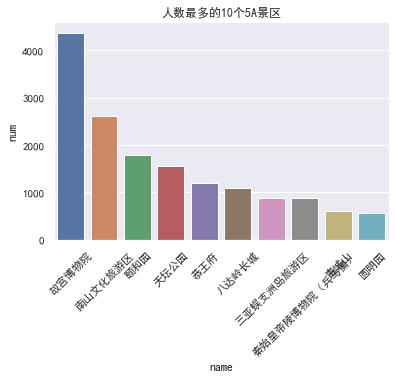

In [51]:
sns.barplot(top_5A['name'][:10],top_5A['num'][:10])
plt.title('人数最多的10个5A景区')  # 设置标题
plt.xticks(rotation=45)
plt.show()

# 数据分布分析

- 景区等级分析

In [52]:
df.head()

,name,level,hot,price,num,province,city,mini_city,level_sum
0,成都大熊猫繁育研究基地,4,0.80,55.0,1574,四川,成都,成华区,1
1,青城山,5,0.96,80.0,596,四川,成都,都江堰市,1
2,成都海昌极地海洋公园,4,0.00,145.0,642,四川,成都,双流区,1
3,都江堰,5,1.00,80.0,378,四川,成都,都江堰市,1
4,成都动物园,0,0.70,20.0,1170,四川,成都,成华区,1


In [54]:
df['level'].value_counts()

0    471
4    154
5     46
3      4
Name: level, dtype: int64

<AxesSubplot:xlabel='count', ylabel='level'>

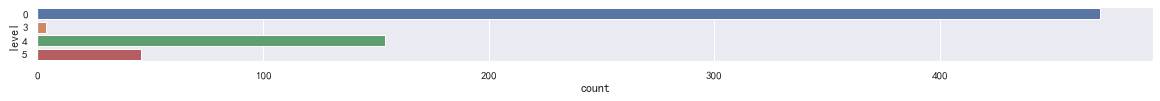

In [55]:
# 设置画布
plt.figure(figsize=(20,1))
sns.countplot(y='level',data=df)

- 热度分布

In [57]:
plt.rcParams['axes.unicode_minus']=False

C:\Users\ZXT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([-0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

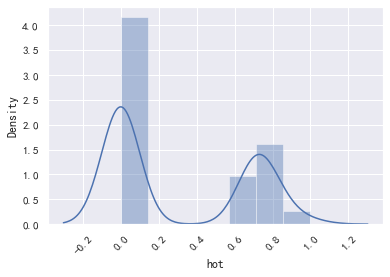

In [59]:
sns.distplot(df['hot'])  # 热度分布图
plt.xticks(rotation=45)

- 价格分布

In [60]:
df.describe()

,level,hot,price,num,level_sum
count,675.000000,675.000000,675.000000,675.000000,675.0
mean,1.271111,0.302756,143.417956,147.776296,1.0
std,1.948669,0.370356,652.256150,674.864760,0.0
min,0.000000,0.000000,0.100000,2.000000,1.0
25%,0.000000,0.000000,24.950000,22.000000,1.0
50%,0.000000,0.000000,58.000000,56.000000,1.0
75%,4.000000,0.720000,128.000000,89.000000,1.0
max,5.000000,1.000000,14580.000000,14312.000000,1.0


In [61]:
df = df.drop(df[df['price']>300].index)  # 删除门票超过300的景点
df.describe()

,level,hot,price,num,level_sum
count,642.000000,642.000000,642.000000,642.000000,642.0
mean,1.316199,0.310343,76.499159,135.476636,1.0
std,1.967288,0.372035,69.861427,626.968185,0.0
min,0.000000,0.000000,0.100000,2.000000,1.0
25%,0.000000,0.000000,20.000000,20.000000,1.0
50%,0.000000,0.000000,55.500000,55.000000,1.0
75%,4.000000,0.720000,114.500000,89.000000,1.0
max,5.000000,1.000000,299.000000,14312.000000,1.0


C:\Users\ZXT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([-100.,    0.,  100.,  200.,  300.,  400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

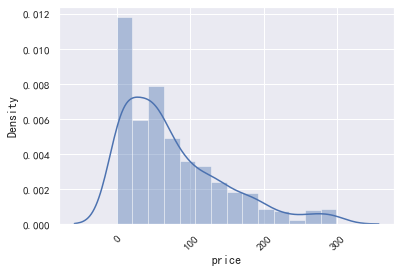

In [62]:
sns.distplot(df['price'])  # 价格分布图
plt.xticks(rotation=45)

- 销量分布

C:\Users\ZXT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000., 16000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

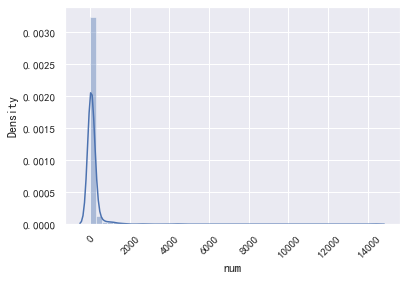

In [64]:
sns.distplot(df['num'])  # 销量分布图
plt.xticks(rotation=45)

<AxesSubplot:xlabel='count', ylabel='num_cut'>

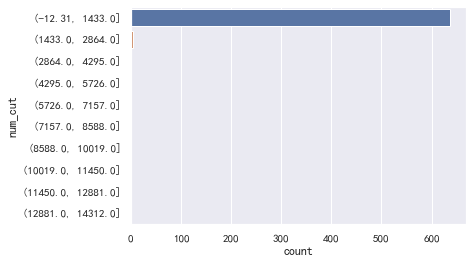

In [65]:
df['num_cut'] = pd.cut(df['num'],10) # 切分销量为10等份
plt.figure()
sns.countplot(y='num_cut',data=df)

In [66]:
df.head()

,name,level,hot,price,num,province,city,mini_city,level_sum,num_cut
0,成都大熊猫繁育研究基地,4,0.80,55.0,1574,四川,成都,成华区,1,"(1433.0, 2864.0]"
1,青城山,5,0.96,80.0,596,四川,成都,都江堰市,1,"(-12.31, 1433.0]"
2,成都海昌极地海洋公园,4,0.00,145.0,642,四川,成都,双流区,1,"(-12.31, 1433.0]"
3,都江堰,5,1.00,80.0,378,四川,成都,都江堰市,1,"(-12.31, 1433.0]"
4,成都动物园,0,0.70,20.0,1170,四川,成都,成华区,1,"(-12.31, 1433.0]"


# 建模前数据预处理

- 删除"level_sum"和"num_cut"两列

In [67]:
df.drop(['level_sum','num_cut'],axis=1,inplace=True)
df.head()

,name,level,hot,price,num,province,city,mini_city
0,成都大熊猫繁育研究基地,4,0.80,55.0,1574,四川,成都,成华区
1,青城山,5,0.96,80.0,596,四川,成都,都江堰市
2,成都海昌极地海洋公园,4,0.00,145.0,642,四川,成都,双流区
3,都江堰,5,1.00,80.0,378,四川,成都,都江堰市
4,成都动物园,0,0.70,20.0,1170,四川,成都,成华区


- 对'province'、'city'、‘mini_city'进行one-hot编码，并合并DataFrame

In [70]:
one_hot_df=pd.get_dummies(df[['province','city','mini_city']])
one_hot_df

,province_上海,province_北京,province_四川,province_广东,province_江苏,province_浙江,province_海南,province_重庆,province_陕西,city_三亚,...,mini_city_雁塔区,mini_city_青城山,mini_city_青浦区,mini_city_青羊区,mini_city_静安区,mini_city_黄埔区,mini_city_黄浦区,mini_city_龙华新区,mini_city_龙岗区,mini_city_龙泉驿
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
670,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
672,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
673,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df=df[['level','hot','price','num']]   # 从DataFrame中提取指定列
# 合并DataFrame
df=pd.merge(df,one_hot_df,left_index=True,right_index=True)
df.head()

,level,hot,price,num,province_上海,province_北京,province_四川,province_广东,province_江苏,province_浙江,...,mini_city_雁塔区,mini_city_青城山,mini_city_青浦区,mini_city_青羊区,mini_city_静安区,mini_city_黄埔区,mini_city_黄浦区,mini_city_龙华新区,mini_city_龙岗区,mini_city_龙泉驿
0,4,0.80,55.0,1574,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0.96,80.0,596,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0.00,145.0,642,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,1.00,80.0,378,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.70,20.0,1170,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 建模

In [74]:
# 导包
from sklearn.model_selection import train_test_split  # 切分数据集
from sklearn.ensemble import RandomForestRegressor # RFC
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [77]:
# 定义特征和标签
X = df[df.columns.difference(['price'])]  # 特征
Y = df['price'] # 标签

In [78]:
# 拆分数据集
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=666)

In [80]:
rf = RandomForestRegressor(n_estimators=20,max_depth=7)  # 建立模型
rf.fit(X_train,Y_train) # 模型训练
pred = rf.predict(X_test) # 拿训练模型完的模型对训练测试集进行预测
pred   # 打印预测结果

array([124.99480354,  50.69732629, 102.06506915,  71.95577545,
        83.23698974,  98.37914185,  73.21444602,  89.23104583,
        65.29328847,  76.57450276,  49.27407155,  48.1398121 ,
        83.23698974,  98.22025587,  50.69732629,  79.80083787,
        71.95577545, 101.42112969,  51.13984335,  84.51660641,
        80.00052644,  76.55234666,  48.1787139 ,  49.72424005,
        79.86613887,  58.28895933,  62.83097833,  68.58492458,
        51.94649745,  86.05634143,  95.93928702,  74.14444602,
        49.60564849,  92.38650583,  79.86613887,  83.23698974,
        68.58492458,  84.51660641,  50.69732629,  51.94649745,
        83.23698974,  49.60564849,  83.73113504,  80.43308589,
        96.89364741,  49.60564849,  71.95577545,  49.60564849,
        50.69732629,  94.14495434,  79.47216405,  49.60564849,
        50.69732629,  76.57450276,  90.22855056,  49.60564849,
        81.43056233,  52.28175424,  48.1398121 ,  52.27042295,
        51.94649745,  79.41854288,  68.31565496,  48.17

In [81]:
# 模型评估
print('MSE',mean_squared_error(Y_test,pred))
print('MAE',mean_absolute_error(Y_test,pred))

MSE 3687.1006704302304
MAE 47.57073567176219
